# G.3 Clustering - Locations

In this notebook, we explore the location based attribute of our nodes. More specifically, we investigate what percentage of nodes in each category (semantic community) is location based. To do so, we use the giant conncted component of our network and explore differences between percentage of location-basedness per category.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests as rq
import pickle
from collections import defaultdict

In [2]:
url = "https://raw.githubusercontent.com/nicosrp/The-Architecture-of-Aspiration-A-Network-Perspective-on-Human-Goals/main/Networks/dayzero_network.pkl"
response = rq.get(url)
G = pickle.loads(response.content)

print(f"Network loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Network loaded: 2890 nodes, 219130 edges


In [3]:
attr_keys = {k for _, attrs in G.nodes(data=True) for k in attrs}
print(sorted(attr_keys))

['category', 'city', 'comments', 'country', 'description', 'have_done', 'included_by_our_users', 'other_map_location', 'tags', 'title', 'wants_to_do']


In [4]:
# using only the giant connected component
components = list(nx.connected_components(G))
largest_cc = max(components, key=len)
Gcc = G.subgraph(largest_cc).copy()

### Locations and Categories/Communities

To explore this, we gather information about location attributes and then compute the percentage of location based goals per category.

In [5]:
location_attrs = ['country', 'city', 'other_map_location']

# Collect a binary indicator for location per category
category_location = defaultdict(list)

for _, data in Gcc.nodes(data=True):
    cat = data.get("category")
    if cat is not None:
        # 1 if any location attribute is assigned, 0 otherwise
        has_location = int(any(data.get(attr) not in [None, 'None'] for attr in location_attrs))
        category_location[cat].append(has_location)

# Compute percentage of nodes with a location per category
percent_location_category = {
    cat: np.mean(vals) * 100 for cat, vals in category_location.items()
}

In [6]:
for cat, score in sorted(percent_location_category.items(), key=lambda x: x[1]):
    print(f"{cat}: {score:.2f}")

Creativity: 0.00
Relationships & social life: 0.00
Academic and professional achievements: 0.00
Health: 11.76
Media consumption: 12.16
New skills: 19.05
Acts of kindness/altruism: 25.00
Food: 50.00
Experiences: 50.62
Religion: 58.82
Sports: 82.22
Events & concerts: 83.86
Nature: 96.53
Travel destinations: 99.40
Places of interest: 99.54


As we can see, the percentages of location based goals varies massively between categories, with a range of 0 to 99.54. 

#### Visualization

Furthermore, we create a visualization of our findings. This is not included in our paper.

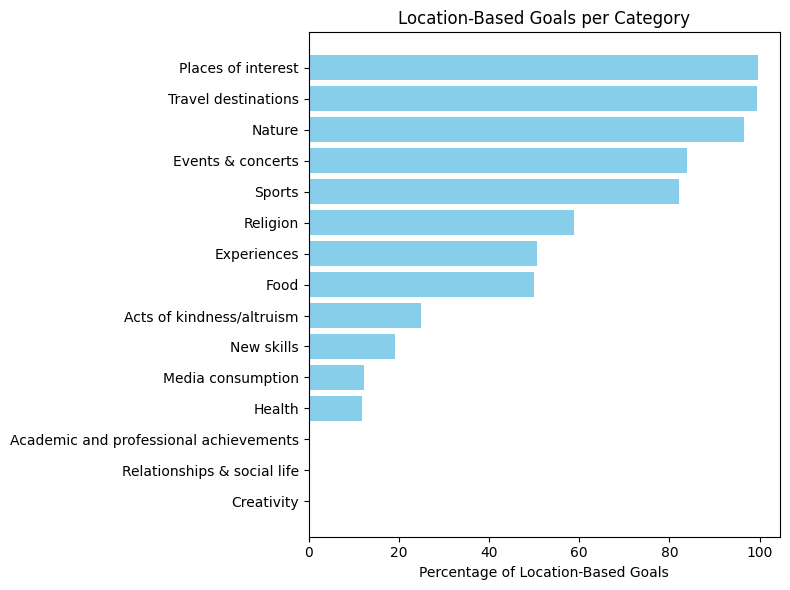

In [7]:
# percent_location_category is a dict: {category: percentage}
# Sort by percentage for clarity
sorted_items = sorted(percent_location_category.items(), key=lambda x: x[1])

categories, percentages = zip(*sorted_items)

plt.figure(figsize=(8,6))
plt.barh(categories, percentages, color='skyblue')
plt.xlabel('Percentage of Location-Based Goals')
plt.title('Location-Based Goals per Category')
plt.tight_layout()
plt.show()